In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#df = pd.read_csv('FINAL_EDGE_TABLE.csv',index_col=[0])
df = pd.read_csv('FINAL_EDGE_TABLE.csv',index_col=[0])
#df.drop(df.columns[0])
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,citypair,sum_departures_performed,sum_departures_scheduled,passengers,seats,avg_fuel_price,avg_stock_price,total_operating_expense,revenue,Aircraft_Unit_Cost ($ millions USD),Aircraft_Inverse_Age 1/age (1/yrs),Number_of_Cancellations,Proportion of Seats filled,Aircraft Age (yrs),Origin_Airport_Code,Destination_Airport_Code,origin_airport_type,origin_lat,origin_long,origin_city,dest_airport_type,dest_lat,dest_long,dest_city,Route_Distance,origin_population,origin_density,dest_population,dest_density,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED
0,0,ABQ-BWI,108.0,110.0,13736.0,15444.0,57.427544,52.842995,9585665.0,11058,74.0,0.090909,2.0,0.889407,11.0,ABQ,BWI,medium_airport,35.040199,-106.609001,Albuquerque,large_airport,39.175400,-76.668297,Baltimore,1670.237770,765693.0,1155.5,2205092.0,2872.8,8.644068,9.440678,0.063492
1,1,ABQ-DAL,488.0,504.0,56344.0,74104.0,56.594778,53.008226,14229909.0,16207,74.0,0.090909,16.0,0.760337,11.0,ABQ,DAL,medium_airport,35.040199,-106.609001,Albuquerque,medium_airport,32.847099,-96.851799,Dallas,580.226586,765693.0,1155.5,5668165.0,1522.2,9.102740,8.075862,0.006803
2,2,ABQ-DEN,330.0,337.0,37782.0,47510.0,56.594778,53.008226,14229909.0,16207,74.0,0.090909,7.0,0.795243,11.0,ABQ,DEN,medium_airport,35.040199,-106.609001,Albuquerque,large_airport,39.861698,-104.672996,Denver,349.103284,765693.0,1155.5,2650725.0,1805.7,18.624521,18.896154,0.003817
3,3,ABQ-HOU,326.0,335.0,39590.0,50650.0,56.927884,52.942134,23815574.0,27265,74.0,0.090909,9.0,0.781639,11.0,ABQ,HOU,medium_airport,35.040199,-106.609001,Albuquerque,medium_airport,29.645399,-95.278900,Houston,759.153724,765693.0,1155.5,5650910.0,1394.6,4.595506,4.044944,0.000000
4,4,ABQ-LAS,324.0,333.0,35966.0,46332.0,57.427544,52.842995,9585665.0,11058,74.0,0.090909,9.0,0.776267,11.0,ABQ,LAS,medium_airport,35.040199,-106.609001,Albuquerque,large_airport,36.083361,-115.151817,Las Vegas,486.424110,765693.0,1155.5,2150373.0,1754.7,15.618321,13.946565,0.015038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,1235,TUS-DEN,265.0,273.0,32204.0,37895.0,57.427544,52.842995,9585665.0,11058,74.0,0.090909,8.0,0.849822,11.0,TUS,DEN,medium_airport,32.115004,-110.938053,Tucson,large_airport,39.861698,-104.672996,Denver,638.735993,875284.0,873.6,2650725.0,1805.7,9.318919,10.494565,0.000000
1236,1236,TUS-LAS,275.0,279.0,32339.0,41117.0,54.929246,53.338689,9288488.0,10298,74.0,0.090909,4.0,0.786512,11.0,TUS,LAS,medium_airport,32.115004,-110.938053,Tucson,large_airport,36.083361,-115.151817,Las Vegas,364.863018,875284.0,873.6,2150373.0,1754.7,7.196262,6.915888,0.009259
1237,1237,TUS-MDW,95.0,100.0,14604.0,16625.0,57.427544,52.842995,9585665.0,11058,74.0,0.090909,5.0,0.878436,11.0,TUS,MDW,medium_airport,32.115004,-110.938053,Tucson,large_airport,41.785999,-87.752403,Chicago,1439.655105,875284.0,873.6,8595181.0,4576.6,6.354839,7.967742,0.000000
1238,1238,TUS-SAN,169.0,171.0,17510.0,24167.0,54.929246,53.338689,4644244.0,5149,74.0,0.090909,2.0,0.724542,11.0,TUS,SAN,medium_airport,32.115004,-110.938053,Tucson,large_airport,32.733601,-117.190002,San Diego,367.806855,875284.0,873.6,3084174.0,1675.9,9.724138,7.879310,0.000000


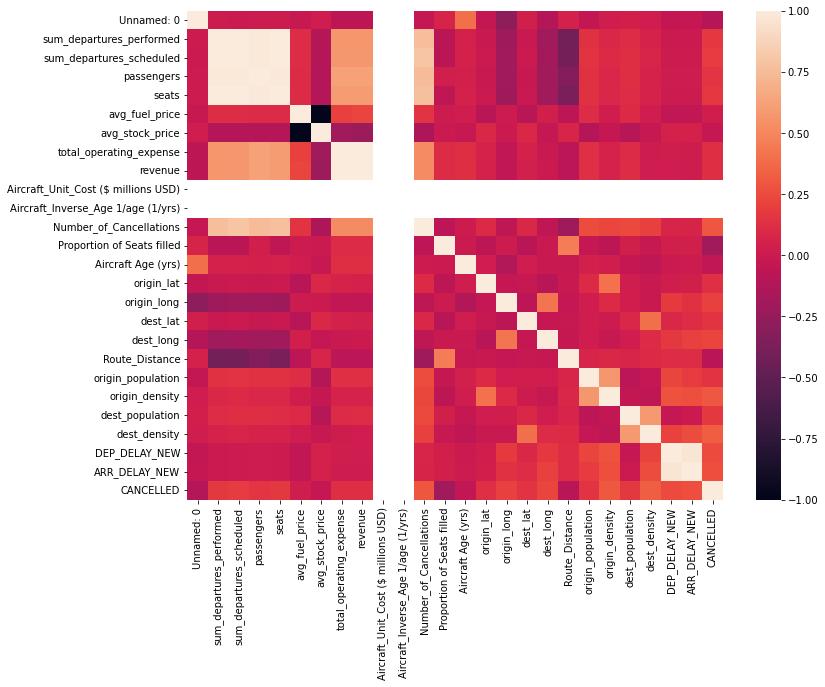

In [3]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)
plt.show()

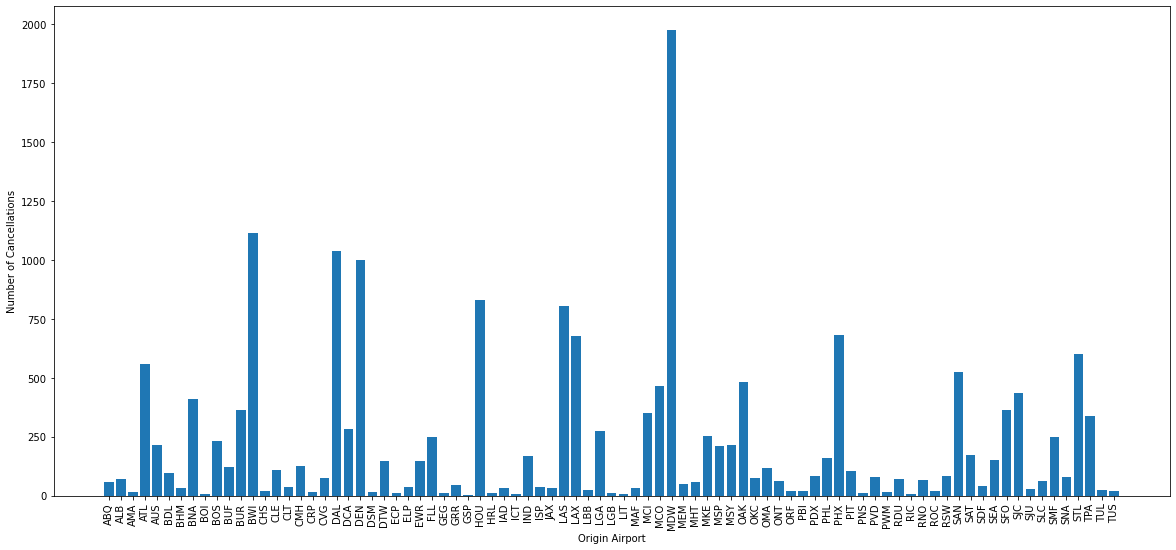

In [4]:
#Airport MDW has surprisingly high cancellations
result1 = df.groupby('Origin_Airport_Code')['Number_of_Cancellations'].sum()
plt.figure(figsize=(20,9))
plt.bar(result1.index,result1.values)
plt.xticks(rotation=90)
plt.xlabel('Origin Airport')
plt.ylabel('Number of Cancellations')
plt.show()

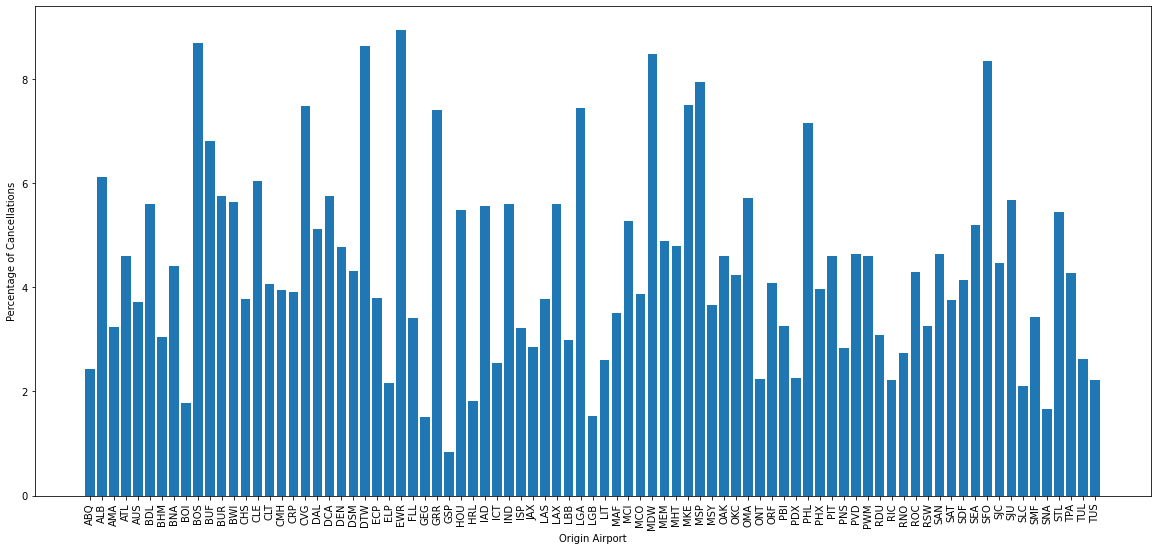

In [5]:
#Proportion of flight cancellations vs origin airport
sum_dept = df.groupby('Origin_Airport_Code')['sum_departures_scheduled'].sum()
sum_canc = df.groupby('Origin_Airport_Code')['Number_of_Cancellations'].sum()
percent_canc = (sum_canc/sum_dept)*100
plt.figure(figsize=(20,9))
plt.bar(percent_canc.index,percent_canc.values)
plt.xticks(rotation=90)
plt.xlabel('Origin Airport')
plt.ylabel('Percentage of Cancellations')
plt.show()

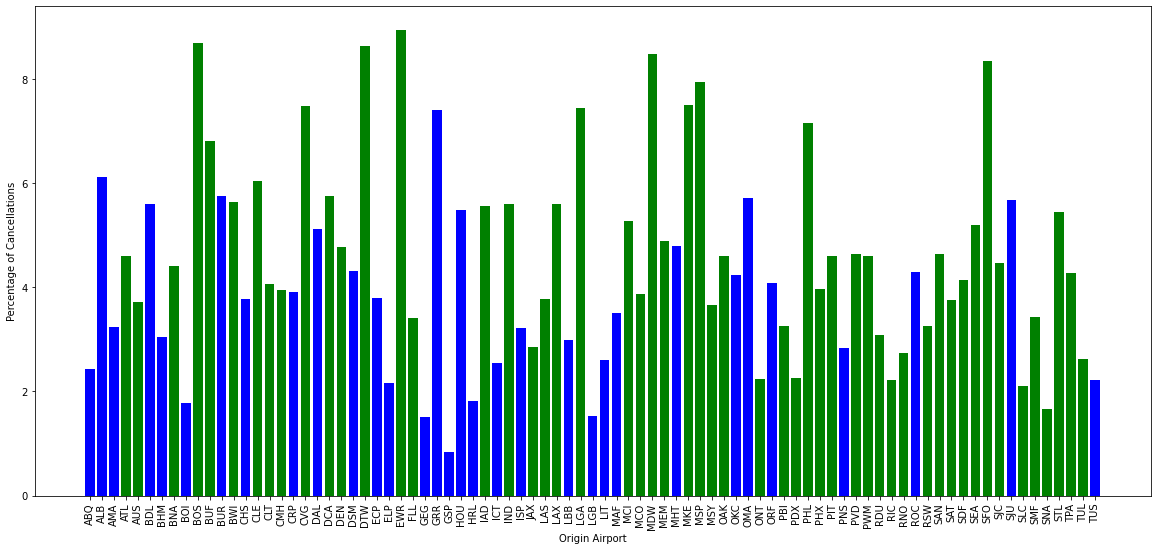

large_airport     53
medium_airport    32
Name: origin_airport_type, dtype: int64


In [6]:
#Higher cancellations are mostly at larger airports 
airport_type = df.groupby('Origin_Airport_Code')['origin_airport_type'].apply(lambda x : x.unique()[0])
colors={'medium_airport':'b','large_airport':'g'}
plt.figure(figsize=(20,9))
plt.bar(percent_canc.index,percent_canc.values,color=[colors[x] for x in airport_type.values])
plt.xticks(rotation=90)
plt.xlabel('Origin Airport')
plt.ylabel('Percentage of Cancellations')
plt.show()
print(airport_type.value_counts())

In [7]:
#Busiest routes: DAL-HOU,SAN-SJC,SMF-SAN,LAX-OAK
busy_routes = df.groupby('citypair')['sum_departures_performed'].sum().sort_values(ascending=False)

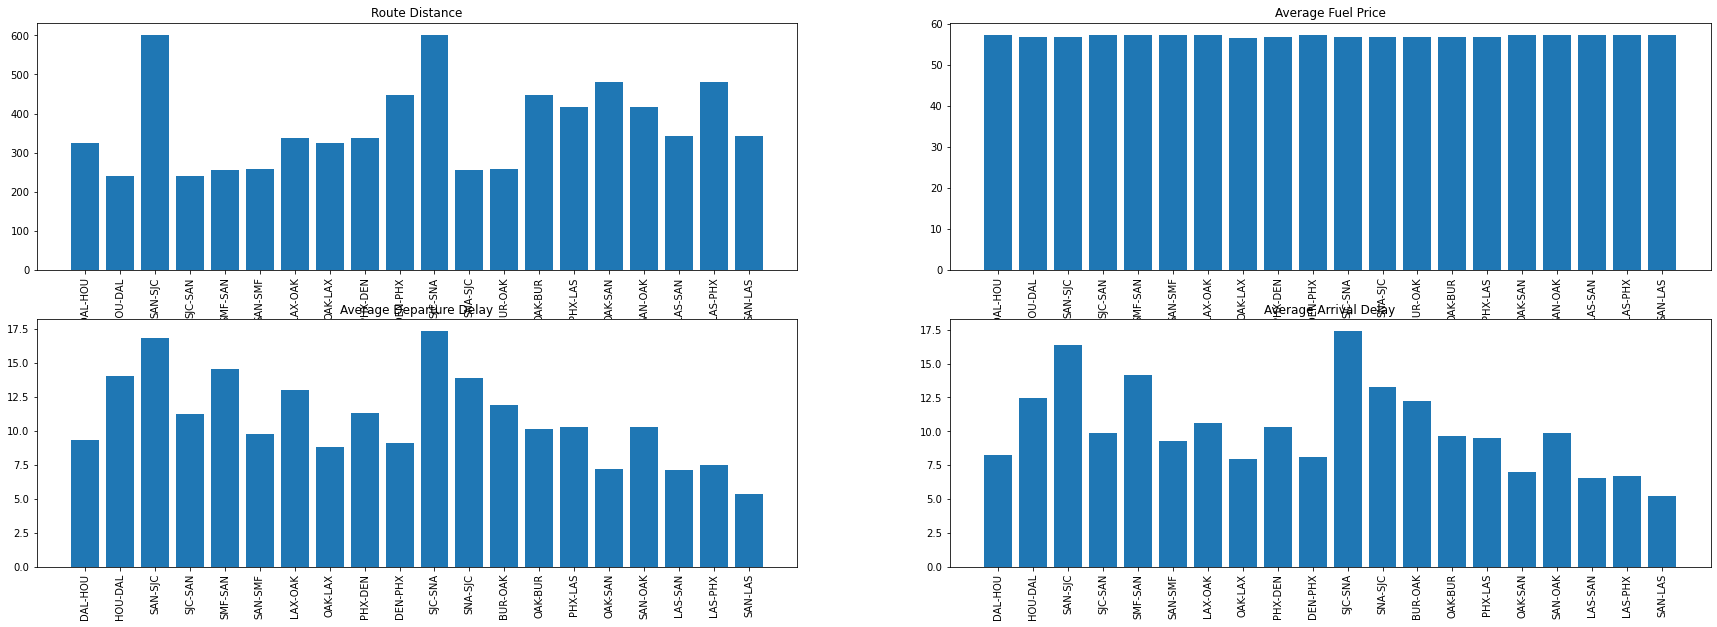

In [8]:
#top 20 busiest routes vs route distance, average fuel price, departure delay, arrival delay
#SJC-SAN route has the longest distance along with high rates of departure and arrival delays
busiest = (busy_routes.index[:20])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
axes[0,0].bar(busiest,df['Route_Distance'].loc[df['citypair'].isin(busiest)])
axes[0,0].set_title('Route Distance')
axes[0,0].set_xticks(busiest)
axes[0,0].tick_params(axis='x', rotation=90)

axes[0,1].bar(busiest,df['avg_fuel_price'].loc[df['citypair'].isin(busiest)])
axes[0,1].set_title('Average Fuel Price')
axes[0,1].set_xticks(busiest)
axes[0,1].tick_params(axis='x', rotation=90)

axes[1,0].bar(busiest,df['DEP_DELAY_NEW'].loc[df['citypair'].isin(busiest)])
axes[1,0].set_title('Average Departure Delay')
axes[1,0].set_xticks(busiest)
axes[1,0].tick_params(axis='x', rotation=90)

axes[1,1].bar(busiest,df['ARR_DELAY_NEW'].loc[df['citypair'].isin(busiest)])
axes[1,1].set_title('Average Arrival Delay')
axes[1,1].set_xticks(busiest)
axes[1,1].tick_params(axis='x', rotation=90)

plt.show()

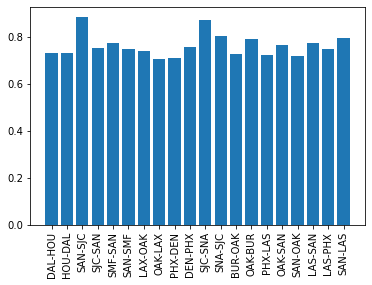

In [9]:
#Proportion of seats filled on the top 20 busiest routes, a large number of passengers take the SJC-SAN route
plt.bar(busiest,df['Proportion of Seats filled'].loc[df['citypair'].isin(busiest)])
plt.xticks(rotation=90)
plt.show()

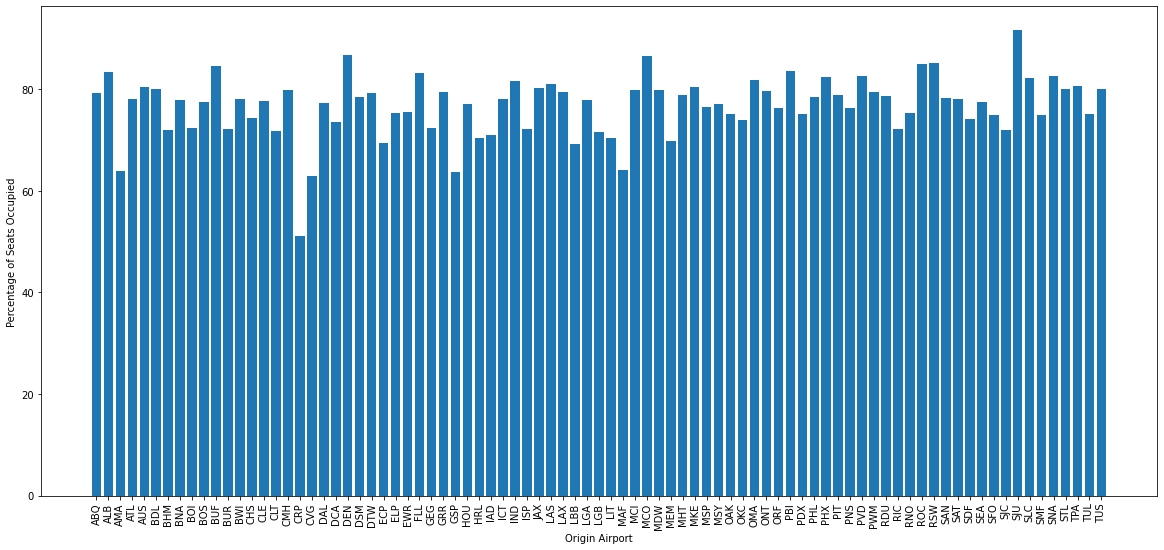

In [10]:
sum_seats = df.groupby('Origin_Airport_Code')['seats'].sum()
seats_fill = df.groupby('Origin_Airport_Code')['passengers'].sum()
percent_seats_fill = (seats_fill/sum_seats)*100

plt.figure(figsize=(20,9))
plt.bar(percent_seats_fill.index,percent_seats_fill.values)
plt.xticks(rotation=90)
plt.xlabel('Origin Airport')
plt.ylabel('Percentage of Seats Occupied')
plt.show()

In [11]:
#Aircraft age range does not give us any important information about delays
(min(df['Aircraft Age (yrs)']),max(df['Aircraft Age (yrs)']))

(11.0, 11.000000000000002)